In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
diabates = pd.read_csv("datasets/pima-indians-diabetes.csv")
diabates.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0                6               0.743719        0.590164  0.353535  0.000000   
1                1               0.427136        0.540984  0.292929  0.000000   
2                8               0.919598        0.524590  0.000000  0.000000   
3                1               0.447236        0.540984  0.232323  0.111111   
4                0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class Group  
0  0.500745  0.234415   50      1     B  
1  0.396423  0.116567   31      0     C  
2  0.347243  0.253629   32      1     B  
3  0.418778  0.038002   21      0     B  
4  0.642325  0.943638   33      1     C

### 1. Normalize numerical columns


In [18]:
diabates.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [19]:
numerical_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
                  'Insulin', 'BMI', 'Pedigree']
diabates[numerical_cols] = diabates[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [20]:
# observe all columns are normalized
diabates[numerical_cols].head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0         0.352941               0.743719        0.590164  0.353535  0.000000   
1         0.058824               0.427136        0.540984  0.292929  0.000000   
2         0.470588               0.919598        0.524590  0.000000  0.000000   
3         0.058824               0.447236        0.540984  0.232323  0.111111   
4         0.000000               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  
0  0.500745  0.234415  
1  0.396423  0.116567  
2  0.347243  0.253629  
3  0.418778  0.038002  
4  0.642325  0.943638

### 2. Define list of feature columns

In [21]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_conc = tf.feature_column.numeric_column('Glucose_concentration')
bp = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Dealing with categorical variables
There are 2 methods used to deal with categorical variables.
1. Using Hash Bucket: This is similar to using scikit learn's FeatureHasher. Use this when you don't know the exact values of the features that will occur. Input is just the number of buckets to hash on. This can be lesser than the number of features. 

2. Using Vocabulary List: This is like using scikit learn's DictVectorizer. Use this when you know the features that are going to be included like "A", "B", "C", "D".

In [22]:
# Using vocabulary list. 
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

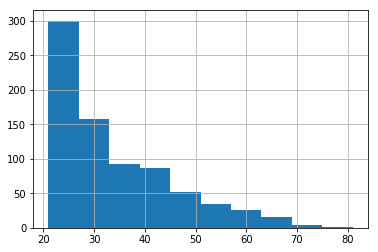

In [23]:
# Histogram of ages
diabates["Age"].hist(bins=10)

In [24]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])
feat_cols = [num_preg, gluc_conc, bp, triceps, insulin, bmi, pedigree, age, age_buckets]
y = diabates["Class"]
X = diabates.drop("Class", axis=1)

### Prepare dataset

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [26]:
train_function = tf.estimator.inputs.pandas_input_fn(X, y, batch_size=8, shuffle=False, num_epochs=1000)

test_function = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=8, shuffle=False)

### 3. Prepare Estimator

In [27]:
estimator = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb20wcwlo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4c534f1cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
estimator.train(input_fn=train_function, steps=1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpb20wcwlo/model.ckpt.
INFO:tensorflow:loss = 5.5451775, step = 1
INFO:tensorflow:global_step/sec: 109.615
INFO:tensorflow:loss = 5.1932898, step = 101 (0.916 sec)
INFO:tensorflow:global_step/sec: 146.904
INFO:tensorflow:loss = 5.3029995, step = 201 (0.680 sec)
INFO:tensorflow:global_step/sec: 149.742
INFO:tensorflow:loss = 2.5617986, step = 301 (0.670 sec)
INFO:tensorflow:global_step/sec: 148.075
INFO:tensorflow:loss = 4.5560436, step = 401 (0.676 sec)
INFO:tensorflow:global_step/sec: 153.391
INFO:tensorflow:loss = 3.9424653, step = 501 (0.655 sec)
INFO:tensorflow:global_step/sec: 145.7
INFO:tensorflow:loss = 6.9965057, step = 601 (0.682 sec)
INFO:tensorflow:global_step/sec: 151.474
INFO:tensorflow:lo

In [29]:
res = estimator.evaluate(input_fn=test_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-10-03:43:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb20wcwlo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-10-03:43:07
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8148972, auc_precision_recall = 0.68888855, average_loss = 0.5373519, global_step = 1000, label/mean = 0.35064936, loss = 4.280286, prediction/mean = 0.45529935


In [30]:
res

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8148972,
 'auc_precision_recall': 0.68888855,
 'average_loss': 0.5373519,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.280286,
 'prediction/mean': 0.45529935}

### 4. Predict

In [31]:
predictions = estimator.predict(input_fn=test_function)

In [32]:
list(predictions)[:5]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb20wcwlo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5464438], dtype=float32),
  'logits': array([0.18631226], dtype=float32),
  'probabilities': array([0.4535562, 0.5464438], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.56642777], dtype=float32),
  'logits': array([0.26729125], dtype=float32),
  'probabilities': array([0.4335722 , 0.56642777], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.19620767], dtype=float32),
  'logits': array([-1.4101672], dtype=float32),
  'probabilities': array([0.8037923 , 0.19620767], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.20084667], dtype=float32),
  'logits': array([-1.381011], dtype=float32),
  'probabilities': array([0.7991533 , 0.20084667], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

## Deep Neural Net Classifier

In [33]:
dnn_estimator = tf.estimator.DNNClassifier(hidden_units=[30, 30, 30, 30], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgbmrum6x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4c53bf2c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
dnn_estimator.train(input_fn=train_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpgbmrum6x/model.ckpt.
INFO:tensorflow:loss = 9.709453, step = 1
INFO:tensorflow:global_step/sec: 113.901
INFO:tensorflow:loss = 5.387681, step = 101 (0.880 sec)
INFO:tensorflow:global_step/sec: 154.455
INFO:tensorflow:loss = 5.193118, step = 201 (0.650 sec)
INFO:tensorflow:global_step/sec: 150.255
INFO:tensorflow:loss = 3.3515172, step = 301 (0.668 sec)
INFO:tensorflow:global_step/sec: 151.082
INFO:tensorflow:loss = 5.0420866, step = 401 (0.657 sec)
INFO:tensorflow:global_step/sec: 155.852
INFO:tensorflow:loss = 3.9946187, step = 501 (0.645 sec)
INFO:tensorflow:global_step/sec: 144.559
INFO:tensorflow:loss = 8.275373, step = 601 (0.692 sec)
INFO:tensorflow:global_step/sec: 114.946
INFO:tensorflow:loss

In [35]:
res = dnn_estimator.evaluate(input_fn=test_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-10-03:43:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgbmrum6x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-10-03:43:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6839827, accuracy_baseline = 0.64935064, auc = 0.7399177, auc_precision_recall = 0.51408166, average_loss = 0.5993931, global_step = 1000, label/mean = 0.35064936, loss = 4.774476, prediction/mean = 0.43413964


In [36]:
res

{'accuracy': 0.6839827,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7399177,
 'auc_precision_recall': 0.51408166,
 'average_loss': 0.5993931,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.774476,
 'prediction/mean': 0.43413964}